<a href="https://colab.research.google.com/github/Sentiago22/Data-analyst/blob/main/Practice%207%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os
import re

# Function to extract texts and corresponding author names from files
def extract_texts_and_authors_from_files(base_path):
    texts = []    # List to store the full text content
    authors = []  # List to store extracted author names

    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith(".txt"):
                # Use regular expression to extract author name from filename (inside parentheses)
                match = re.search(r"\((.*?)\)", file)
                author = match.group(1).strip() if match else "Unknown"

                file_path = os.path.join(root, file)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        text = f.read()
                        texts.append(text)
                        authors.append(author)
                except Exception as e:
                    print(f"Failed to read {file_path}: {e}")

    return texts, authors

# Apply the function to the folder containing texts
texts, classes = extract_texts_and_authors_from_files('/content/texts')

# Print the number of samples and unique authors
print(f"Total text samples loaded: {len(texts)}")
print(f"Unique authors found: {len(set(classes))}")
print("Sample author names:", list(set(classes))[:10])


Total text samples loaded: 12
Unique authors found: 6
Sample author names: ['Клиффорд_Саймак', 'Макс Фрай', 'Булгаков', 'Стругацкие', 'О. Генри', 'Рэй Брэдберри']


In [38]:
from collections import Counter
print("Samples per author:")
print(Counter(classes))

Samples per author:
Counter({'Рэй Брэдберри': 2, 'Клиффорд_Саймак': 2, 'О. Генри': 2, 'Стругацкие': 2, 'Булгаков': 2, 'Макс Фрай': 2})


**А. Запустите нейронку c bag of words (01) при разных maxWordsCount**

1. 100

2. 1000

3. 10000

In [39]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold

In [42]:
# 2. Load data
texts, classes = extract_texts_and_authors_from_files("/content/texts")
print(f"Loaded {len(texts)} texts from {len(set(classes))} authors")

# 3. Encode class labels
encoder = LabelEncoder()
y_all = encoder.fit_transform(classes)
num_classes = len(set(classes))

# 4. Try different maxWordsCount
max_words_list = [100, 1000, 10000]

for maxWordsCount in max_words_list:
    print(f"\nRunning model with maxWordsCount = {maxWordsCount}")

    # Bag-of-Words (binary)
    tokenizer = Tokenizer(num_words=maxWordsCount, oov_token='unknown')
    tokenizer.fit_on_texts(texts)
    X_all = tokenizer.texts_to_matrix(texts, mode='binary')  # Binary BoW
    y_all_cat = to_categorical(y_all, num_classes=num_classes)

    # Use Stratified K-Fold (3 folds for 12 samples)
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, test_index in skf.split(X_all, y_all):
        X_train, X_test = X_all[train_index], X_all[test_index]
        y_train, y_test = y_all_cat[train_index], y_all_cat[test_index]

        model = Sequential()
        model.add(Dense(64, input_shape=(maxWordsCount,), activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=25, batch_size=2, verbose=0)
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        fold_accuracies.append(acc)

    avg_acc = np.mean(fold_accuracies)
    print(f"Average accuracy (3-Fold CV): {avg_acc:.4f}")

Loaded 12 texts from 6 authors

Running model with maxWordsCount = 100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average accuracy (3-Fold CV): 0.0833

Running model with maxWordsCount = 1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average accuracy (3-Fold CV): 0.2500

Running model with maxWordsCount = 10000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average accuracy (3-Fold CV): 0.4167


**Б. Запустите нейронку c bag of words  при maxWordsCount = 10000 и разных архитектурах**

1. Поменяйте количество нейронов в слоях

2. Поменяйте количество слоев

3. Поменяйте активационные функции слоев

In [43]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [47]:
# Load data
texts, classes = extract_texts_and_authors_from_files('/content/texts')
print(f"Loaded {len(texts)} texts from {len(set(classes))} authors")

# Encode labels
encoder = LabelEncoder()
y_all = encoder.fit_transform(classes)
y_all_cat = to_categorical(y_all)
num_classes = y_all_cat.shape[1]

# Tokenize with maxWordsCount = 10000
maxWordsCount = 10000
tokenizer = Tokenizer(num_words=maxWordsCount, oov_token='unknown')
tokenizer.fit_on_texts(texts)
X_all = tokenizer.texts_to_matrix(texts, mode='binary')  # Binary BoW

# Define architectures
architectures = {
    "A_relu_64_32":     {"layers": [64, 32], "activation": "relu"},
    "B_relu_128_64":    {"layers": [128, 64], "activation": "relu"},
    "C_tanh_128_64":    {"layers": [128, 64], "activation": "tanh"},
    "D_relu_64_64_32":  {"layers": [64, 64, 32], "activation": "relu"},
    "E_linear_256":     {"layers": [256], "activation": "linear"}
}

# Cross-validation setup
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Evaluate each architecture
for arch_name, config in architectures.items():
    acc_list = []
    for train_idx, test_idx in skf.split(X_all, y_all):
        X_train, X_test = X_all[train_idx], X_all[test_idx]
        y_train, y_test = y_all_cat[train_idx], y_all_cat[test_idx]

        model = Sequential()
        model.add(Dense(config['layers'][0], input_shape=(maxWordsCount,), activation=config['activation']))
        for units in config['layers'][1:]:
            model.add(Dense(units, activation=config['activation']))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=15, batch_size=2, verbose=0)
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        acc_list.append(acc)

    avg_acc = np.mean(acc_list)
    print(f"Architecture {arch_name} → Average accuracy: {avg_acc:.4f}")

Loaded 12 texts from 6 authors


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Architecture A_relu_64_32 → Average accuracy: 0.5000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Architecture B_relu_128_64 → Average accuracy: 0.3333


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Architecture C_tanh_128_64 → Average accuracy: 0.1667


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Architecture D_relu_64_64_32 → Average accuracy: 0.4167


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Architecture E_linear_256 → Average accuracy: 0.4167


**В. Запустите нейронку c Embbedding при maxWordsCount = 10000, поменяйте размер Embedding пространства**

1. 10

2. 50

3. 200

In [49]:
# Load data
texts, classes = extract_texts_and_authors_from_files('/content/texts')
print(f"✅ Loaded {len(texts)} texts from {len(set(classes))} authors")

# Encode labels
encoder = LabelEncoder()
y_all = encoder.fit_transform(classes)
y_all_cat = to_categorical(y_all)
num_classes = y_all_cat.shape[1]

# Tokenization (prepare sequences)
maxWordsCount = 10000
maxTextLen = 200  # max sequence length
tokenizer = Tokenizer(num_words=maxWordsCount, oov_token="unknown")
tokenizer.fit_on_texts(texts)
X_seq = tokenizer.texts_to_sequences(texts)
X_all = pad_sequences(X_seq, maxlen=maxTextLen)

# STEP 2: Try different embedding sizes
embedding_dims = [10, 50, 200]

for emb_dim in embedding_dims:
    acc_list = []
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

    for train_idx, test_idx in skf.split(X_all, y_all):
        X_train, X_test = X_all[train_idx], X_all[test_idx]
        y_train, y_test = y_all_cat[train_idx], y_all_cat[test_idx]

        model = Sequential()
        model.add(Embedding(input_dim=maxWordsCount, output_dim=emb_dim, input_length=maxTextLen))
        model.add(GlobalAveragePooling1D())  # Average across sequence
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=15, batch_size=2, verbose=0)
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        acc_list.append(acc)

    avg_acc = np.mean(acc_list)
    print(f"✅ Embedding dim = {emb_dim} → Average accuracy: {avg_acc:.4f}")

✅ Loaded 12 texts from 6 authors


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Embedding dim = 10 → Average accuracy: 0.3333


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Embedding dim = 50 → Average accuracy: 0.2500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Embedding dim = 200 → Average accuracy: 0.2500


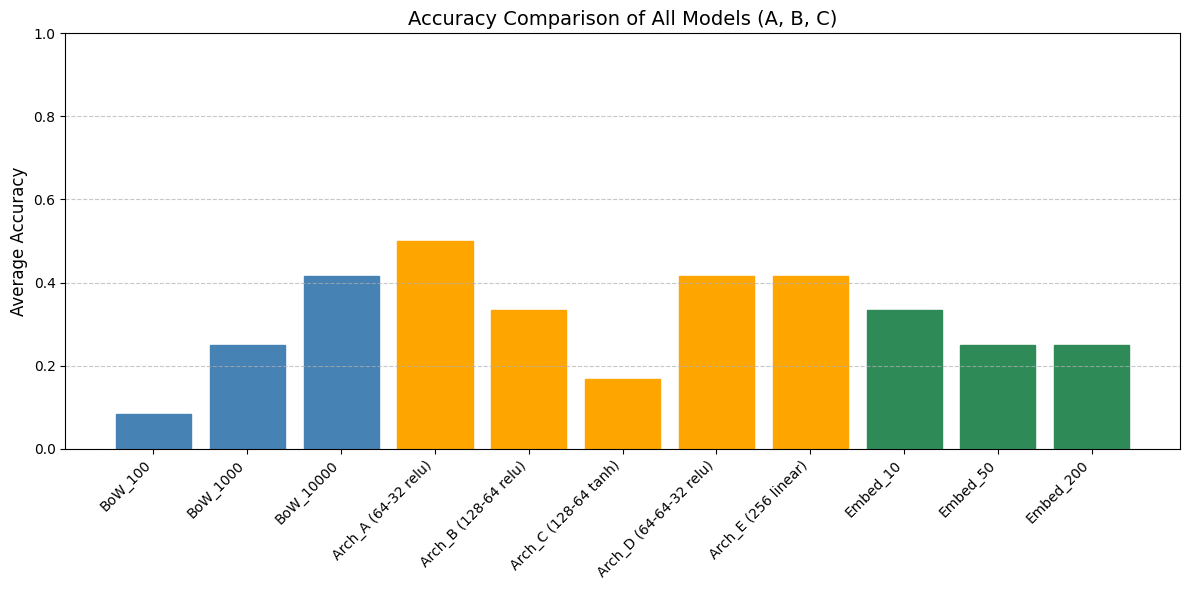

In [51]:
import matplotlib.pyplot as plt

# ✏️ Điền kết quả trung bình đã ghi nhận được (ví dụ từ log in ra)
results_A = {
    "BoW_100": 0.0833,
    "BoW_1000": 0.2500,
    "BoW_10000": 0.4167
}

results_B = {
    "Arch_A (64-32 relu)": 0.5000,
    "Arch_B (128-64 relu)": 0.3333,
    "Arch_C (128-64 tanh)": 0.1667,
    "Arch_D (64-64-32 relu)": 0.4167,
    "Arch_E (256 linear)": 0.4167
}

results_C = {
    "Embed_10": 0.3333,
    "Embed_50": 0.2500,
    "Embed_200": 0.2500
}

# Gộp dữ liệu
all_labels = list(results_A.keys()) + list(results_B.keys()) + list(results_C.keys())
all_scores = list(results_A.values()) + list(results_B.values()) + list(results_C.values())

# Tạo biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(all_labels, all_scores)

# Tô màu theo nhóm
for i, label in enumerate(all_labels):
    if "BoW" in label:
        bars[i].set_color("steelblue")
    elif "Arch" in label:
        bars[i].set_color("orange")
    elif "Embed" in label:
        bars[i].set_color("seagreen")

plt.title("Accuracy Comparison of All Models (A, B, C)", fontsize=14)
plt.ylabel("Average Accuracy", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
